In [81]:
import numpy as np
import yt
import matplotlib.pyplot as plt

In [82]:
CONST_pc  = 3.086e18
CONST_yr  = 3.154e7
CONST_amu = 1.66053886e-24
CONST_kB  = 1.3806505e-16
unit_length = CONST_pc*1e3  # 1 kpc
unit_time   = CONST_yr*1e6  # 1 Myr
unit_density = CONST_amu    # 1 mp/cm-3
unit_velocity = unit_length/unit_time
KELVIN = unit_velocity*unit_velocity*CONST_amu/CONST_kB

g = 5/3
T_floor = 10000.0
T_ceil = 1e8

X = 1.0
Y = 0.0
Z = 0.0

mu = 1.0/(2.*X+ 3.*(1.-X-Z)/4.+ Z/2.)
mue = 2.0/(1.0+X)
muH = 1.0/X
mH = 1.0

In [83]:
from yt import derived_field

@derived_field(name="temp", units="code_length**3*code_pressure/code_mass", sampling_type="cell")
def _temp(field, data):
    return (data["gas", "pressure"] / data["gas", "density"]) * KELVIN * mu

yt : [WARNING  ] 2021-12-20 16:05:22,196 Field ('gas', 'temp') already exists. To override use force_override=True.


In [84]:
data_dir = "../work_turb_cloud/"
# data_dir = "../work_turb_cloud_Bfield/"
# data_dir = "/afs/mpa/temp/hitesh/athena_plusplus_output/256^3box_16nd/"

In [85]:

ds = yt.load(data_dir+"Turb.out2.00009.athdf")

yt : [WARNING  ] 2021-12-20 16:05:22,314 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2021-12-20 16:05:22,315 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2021-12-20 16:05:22,316 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2021-12-20 16:05:22,317 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-12-20 16:05:22,327 Parameters: current_time              = 36.017446010392604
yt : [INFO     ] 2021-12-20 16:05:22,329 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2021-12-20 16:05:22,330 Parameters: domain_left_edge          = [-15. -15. -15.]
yt : [INFO     ] 2021-12-20 16:05:22,332 Parameters: domain_right_edge         = [15. 15. 15.]
yt : [INFO     ] 2021-12-20 16:05:22,333 Parameters: cosmological_simulation   = 0.0


In [86]:
# p = yt.ProjectionPlot(ds,"x",("gas","temp"), weight_field=("gas","density"))
# p.annotate_title("Temperature slice")

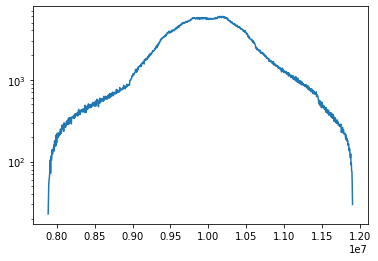

In [87]:
import hdf5_to_nparray as hn

rho_arr, time = hn.hdf2arr_ds(ds, field="density")
prs_arr, time = hn.hdf2arr_ds(ds, field="pressure")

T_arr, time = hn.hdf2arr_ds(ds, field="temp")

v1_arr, time = hn.hdf2arr_ds(ds, field="vel1")
v2_arr, time = hn.hdf2arr_ds(ds, field="vel2")
v3_arr, time = hn.hdf2arr_ds(ds, field="vel3")

hist = np.histogram(T_arr,bins=1000)

# print(hist)

# print(np.shape(hist[0]))
# print(np.shape(hist[1]))

# np.min(T_arr)

dT = np.roll(hist[1],-1) - hist[1]
bin_center = (hist[1]+dT)[:-1]

plt.figure()
plt.yscale('log')
plt.plot(bin_center,hist[0])

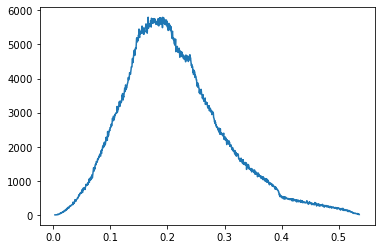

In [90]:
gamma = 5/3

vel_mag = np.sqrt(v1_arr**2 + v2_arr**2 + v3_arr**2 )

cs = np.sqrt(gamma*prs_arr/rho_arr)

hist = np.histogram(vel_mag/cs,bins=1000)

# print(hist)

# print(np.shape(hist[0]))
# print(np.shape(hist[1]))

# np.min(T_arr)

dT = np.roll(hist[1],-1) - hist[1]
bin_center = (hist[1]+dT)[:-1]

plt.figure()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(0.000000000001,10000)
plt.plot(bin_center,hist[0])


In [89]:
np.average(vel_mag/cs)

0.21215764851835123